In [ ]:
import numpy as np
data = np.ones(5)
noisy = contaminate(data, 0.1, seed=0)
print noisy
noisy, std = contaminate(data, 0.05, seed=0, percent=True, return_stddev=True)
print std
print noisy
data = [np.zeros(5), np.ones(3)]
noisy = contaminate(data, [0.1, 0.2], seed=0)
print noisy[0]
print noisy[1]

In [97]:
# SUBROUTINE GSUM(xobs,yobs,zo,NPo,Xcp,Ycp,zt,zb,VdR,NPp,DXp,DYp,gzT)
# EVALUATION OF GRAVITY SIGNAL DUE TO ENTIRE PRISM MODEL FOR EACH OBSERVATION POINT 
# Input parameters:
    # xobs,yobs,zo: Npo dimensional vectors of observation positions (km)
    # NPo: number of observations (npts*npts)
    # Xcp,Ycp,zt,zb: NPb dimensional vectors of prism positions (Xcp,Ycp: center of prism,
    # zt: top of prism, 
    # zb: bottom of prism)	 (km)
    # VdR: NPb dimensional vectors of horizontal density distribution for the prism model (g/cm^3)
    # NPp: number of prisms
    # DXp,DYp: horizontal length of prisms	 (km)
    
# Ouput Parameters:
    # gzT: NPo dimensional vector of gravity field in each observation point due to all prisms	 (mGal)
#
#     
#      INTEGER NPo,NPp,IO,IB
#      REAL(4) xobs(NPo),yobs(NPo),zo(NPo),gzT(NPo)
#      REAL(4) Xcp(NPp),Ycp(NPp),zt(NPp),zb(NPp),VdR(NPp)
#      REAL(4) DXp,DYp,dR,dRsi,dgzp,sdgzp,x1,x2,y1,y2
#      REAL(4) GBOX 
#   
# DO IO = 1, NPo
#		sdgzp = 0.0
#		DO IB = 1, NPp
#			y1 = Ycp(IB) - DYp/2
#			y2 = Ycp(IB) + DYp/2
#			x1 = Xcp(IB) - DXp/2
#			x2 = Xcp(IB) + DXp/2
#	        dRsi = VdR(IB)*1.e3 ! g/cm3 to kg/m3 (SI)
#		    dgzp = GBOX(xobs(IO),yobs(IO),zo(IO),x1,y1,zt(IB),x2,y2,zb(IB),
#	1	                dRsi)
#			sdgzp = sdgzp + dgzp
#		END DO
#		gzT(IO) = sdgzp
#	END DO 
#	
#	RETURN
 #     END

NameError: name 'contaminate' is not defined

In [1]:
# Importing all usefull libraris
import numpy as np
import gravmag_codes as gmc
import matplotlib.pyplot as plt

In [2]:
npts = 50
x = np.linspace(-1000., 1000, npts)
y = np.linspace(-1000., 1000, npts)

dx, dy = (x[1] - x[0]), (y[1] - y[0])

X, Y = np.meshgrid(x, y)

xmin, xmax, ymin, ymax = np.min(X), np.max(X), np.min(Y), np.max(Y)

In [91]:
zo = -100.
#zt = 10.
#zb = 20.
zt = np.random.normal(loc = 1., scale = 0.1, size = (npts))
zb = np.random.normal(loc = 25., scale = 1, size = (npts))
zb2 = np.random.normal(loc = 65., scale = 2, size = (npts))

In [92]:
rho1 = -1500. #g/cm^3
rho2 = 2673. #g/cm^3

In [93]:
Gz = np.zeros_like(X)
gz1 = np.copy(Gz)
gz2 = np.copy(Gz)
x1 = np.zeros_like(x)
x2 = np.zeros_like(x)
y1 = np.zeros_like(x)
y2 = np.zeros_like(x)

In [94]:
for i in range(npts):
    x1[i] = (x[i] - dx)/2.
    x2[i] = (x[i] + dx)/2.
    y1[i] = (y[i] - dy)/2.
    y2[i] = (y[i] + dy)/2.
    gz1 += gmc.prism_gz(X, Y, zo, [x2[i], x1[i], y2[i], y1[i], zt[i], zb[i], rho1])
    gz2 += gmc.prism_gz(X, Y, zo, [x2[i], x1[i], y2[i], y1[i], zb[i], zb2[i], rho2])
    Gz = gz1 + gz2 

In [95]:
print 'Shape de Gz:', Gz.shape
print 'Tamanho de Gz:', Gz.size
print 'Valor minimo:', np.min(Gz)
print 'Valor maximo:', np.max(Gz)

Shape de Gz: (50, 50)
Tamanho de Gz: 2500
Valor minimo: 0.0200626707349
Valor maximo: 3.28715436092


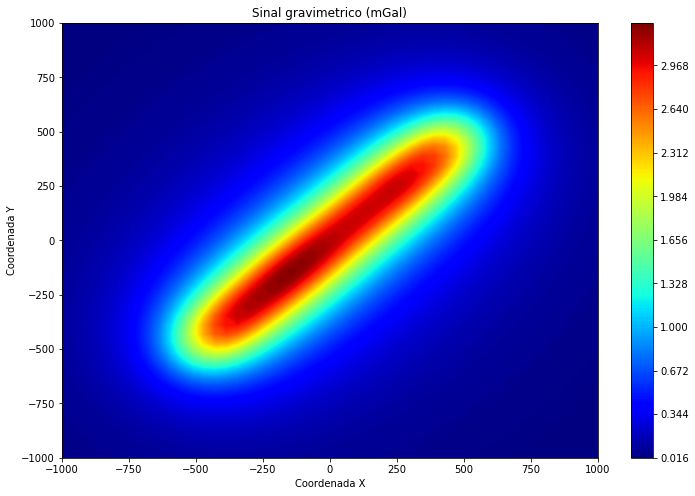

In [96]:
plt.figure(figsize=(12,8))
plt.title('Sinal gravimetrico (mGal)')
plt.contourf(X, Y, Gz, 500, cmap = plt.cm.jet)
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.colorbar()
plt.show()